<a href="https://colab.research.google.com/github/SridharaniKatipally/Learnflow-DataScience/blob/main/Social_Media_Influence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas seaborn matplotlib networkx


In [2]:
# Upload kaggle.json
from google.colab import files
files.upload()

# Install Kaggle
!pip install kaggle

# Create a directory for Kaggle and move the API token there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d noahgift/social-power-nba

# Unzip the dataset
!unzip social-power-nba.zip


Saving archive (5).zip to archive (5).zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/noahgift/social-power-nba
License(s): CC-BY-NC-SA-4.0
  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 79.1MB/s]
Archive:  social-power-nba.zip
  inflating: nba_2016_2017_100.csv   
  inflating: nba_2017_att_val.csv    
  inflating: nba_2017_att_val_elo.csv  
  inflating: nba_2017_att_val_elo_with_cluster.csv  
  inflating: nba_2017_attendance.csv  
  inflating: nba_2017_br.csv         
  inflating: nba_2017_elo.csv        
  inflating: nba_2017_endorsements.csv  
  inflating: nba_2017_nba_players_with_salary.csv  
  inflating: nba_2017_pie.csv        
  inflating: nba_2017_player_wikipedia.csv  
  inflating: nba_2017_players_stats_combined.csv  
  inflating: nba_2017_players_with_salary_wiki_twitter.csv  
  inflating: nba_2017_real_plus_minus.csv  
  infl

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Load the specific CSV file
df = pd.read_csv('nba_2017_twitter_players.csv')

# Display the first few rows of the dataframe
df.head()


,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [7]:
# Check for missing values
df.isnull().sum()

# Check the data types
df.dtypes

# Display summary statistics
df.describe()


,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,326.000000,326.000000
mean,183.409509,72.702454
std,877.434162,287.594633
min,0.000000,0.000000
25%,2.000000,6.000000
50%,17.000000,14.000000
75%,59.375000,38.375000
max,12278.000000,2941.000000


In [9]:
# List all the columns in the DataFrame
print(df.columns)


Index(['PLAYER', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT'], dtype='object')


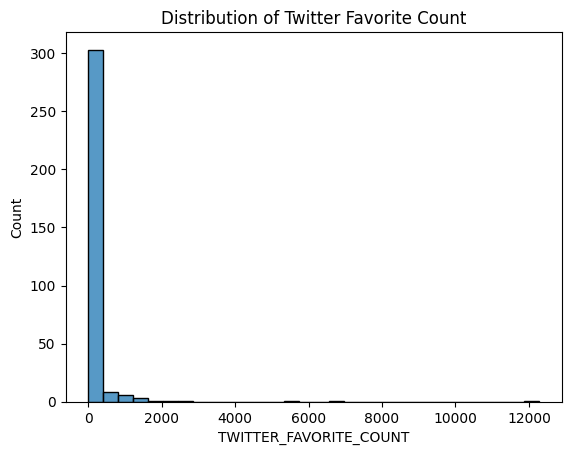

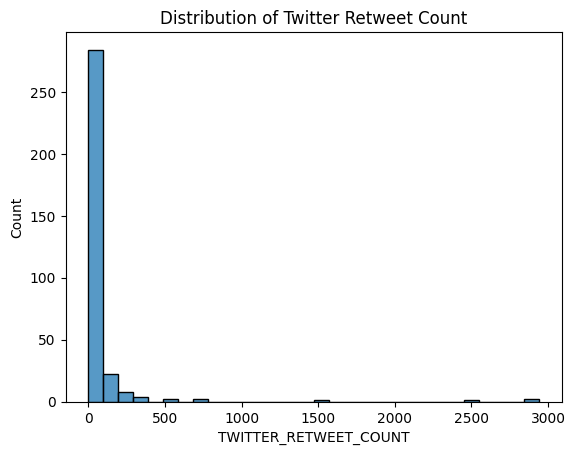

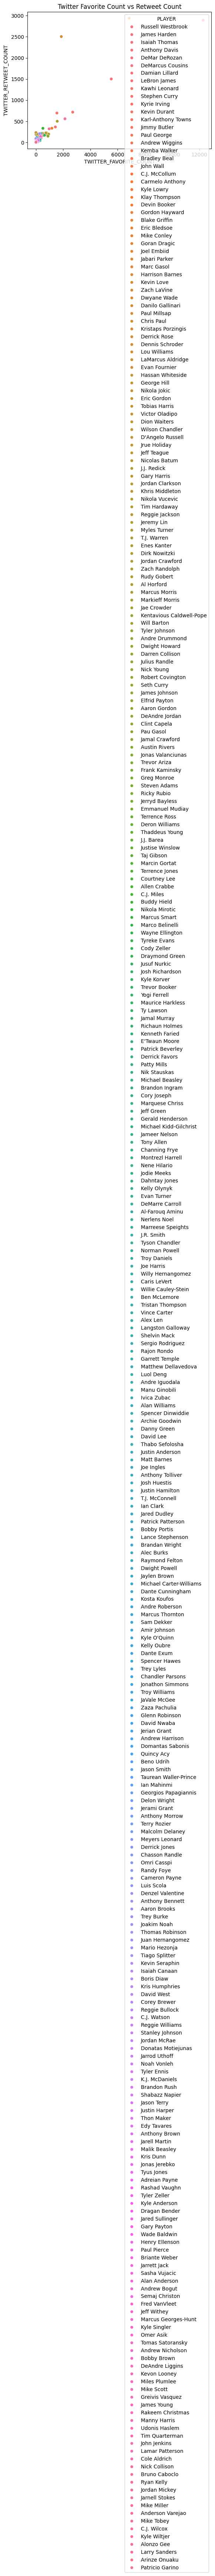

In [10]:
# Distribution of social media metrics
sns.histplot(df['TWITTER_FAVORITE_COUNT'], bins=30)
plt.title('Distribution of Twitter Favorite Count')
plt.show()

sns.histplot(df['TWITTER_RETWEET_COUNT'], bins=30)
plt.title('Distribution of Twitter Retweet Count')
plt.show()

# Relationship between favorite count and retweet count
sns.scatterplot(data=df, x='TWITTER_FAVORITE_COUNT', y='TWITTER_RETWEET_COUNT', hue='PLAYER')
plt.title('Twitter Favorite Count vs Retweet Count')
plt.show()


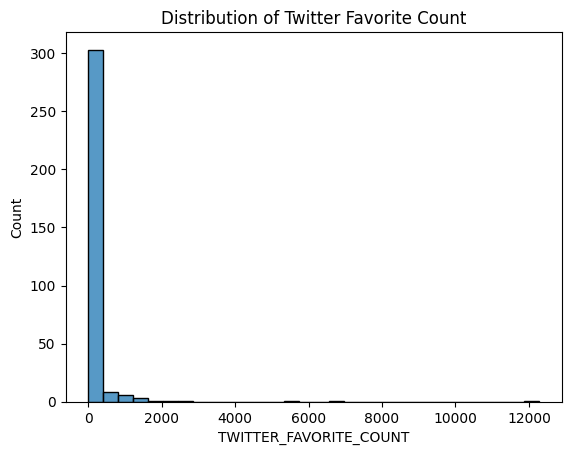

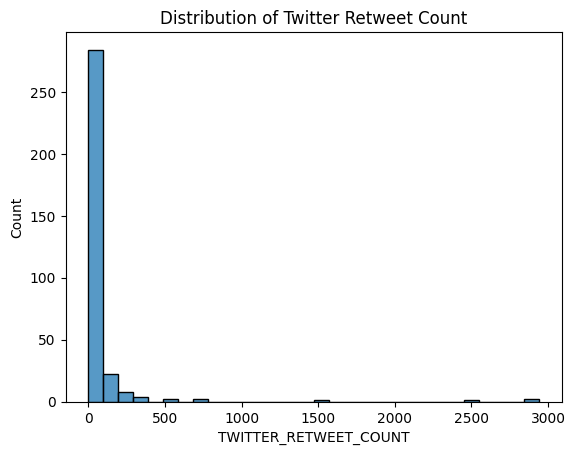

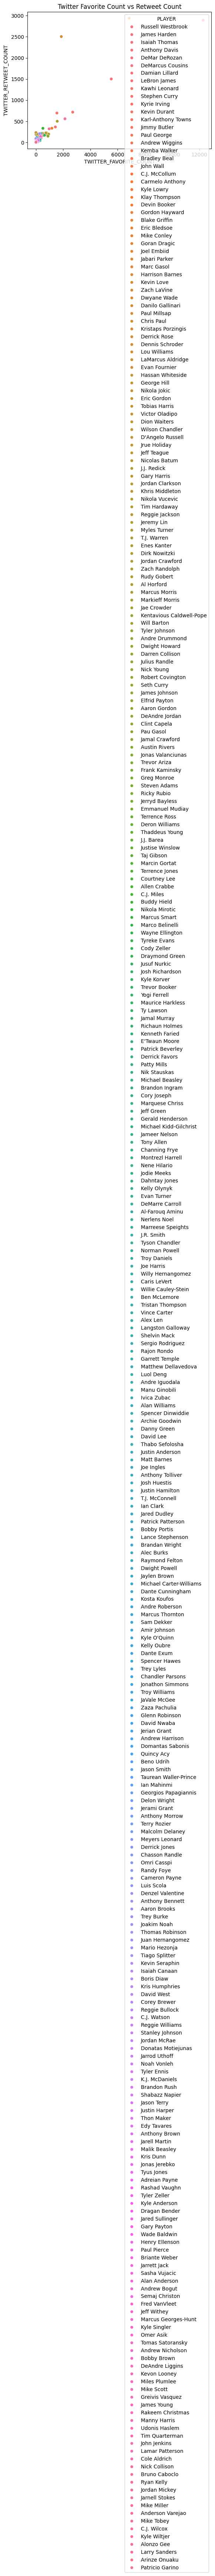

In [12]:
# Step 4: Data Preprocessing
# Check for missing values
df.isnull().sum()

# Check the data types
df.dtypes

# Display summary statistics
df.describe()

# Step 5: Exploratory Data Analysis
# Distribution of social media metrics
sns.histplot(df['TWITTER_FAVORITE_COUNT'], bins=30)
plt.title('Distribution of Twitter Favorite Count')
plt.show()

sns.histplot(df['TWITTER_RETWEET_COUNT'], bins=30)
plt.title('Distribution of Twitter Retweet Count')
plt.show()

# Relationship between favorite count and retweet count
sns.scatterplot(data=df, x='TWITTER_FAVORITE_COUNT', y='TWITTER_RETWEET_COUNT', hue='PLAYER')
plt.title('Twitter Favorite Count vs Retweet Count')
plt.show()



In [17]:
# Step 6: Network Analysis
# Create a graph from the data
G = nx.from_pandas_edgelist(df, source='PLAYER', target='TWITTER_FAVORITE_COUNT', edge_attr=True)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Function to handle duplicate player names
def map_centrality(player):
    if player in degree_centrality:
        return degree_centrality[player]
    else:
        return None

# Add centrality measures to the dataframe
df['degree_centrality'] = df['PLAYER'].apply(map_centrality)

# Display the top influential users
top_influencers = df.drop_duplicates(subset=['PLAYER']).sort_values(by='degree_centrality', ascending=False).head(10)
print(top_influencers[['PLAYER', 'degree_centrality']])


                    PLAYER  degree_centrality
0        Russell Westbrook           0.002053
226  Taurean Waller-Prince           0.002053
224             Beno Udrih           0.002053
223             Quincy Acy           0.002053
222       Domantas Sabonis           0.002053
221        Andrew Harrison           0.002053
220           Jerian Grant           0.002053
219            David Nwaba           0.002053
218         Glenn Robinson           0.002053
217          Zaza Pachulia           0.002053


In [20]:
print(df.columns)


Index(['PLAYER', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT',
       'degree_centrality'],
      dtype='object')


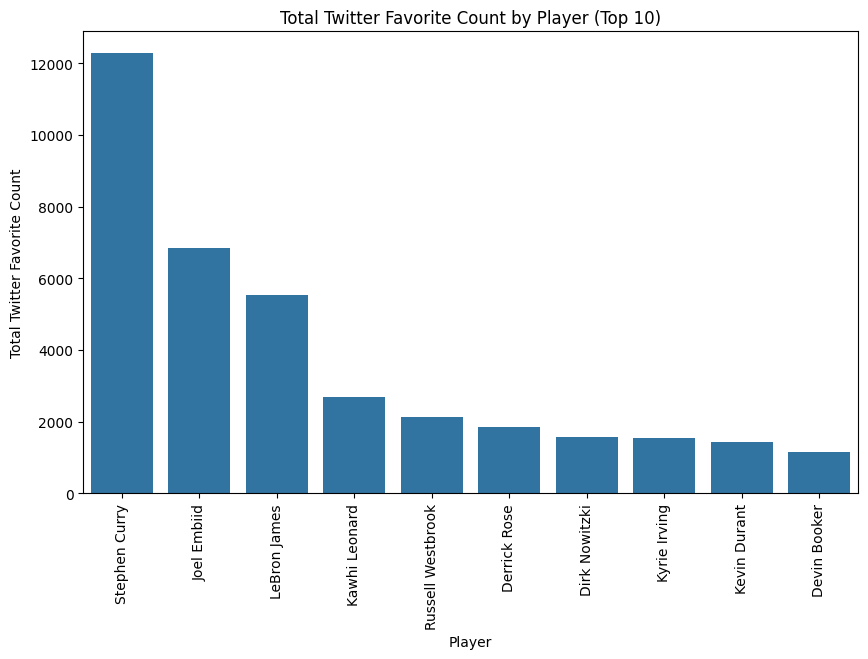

In [21]:
# Step 7: Trend Analysis
# Total Twitter favorite count by player
player_trends = df.groupby('PLAYER')['TWITTER_FAVORITE_COUNT'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=player_trends.index[:10], y=player_trends.values[:10])
plt.title('Total Twitter Favorite Count by Player (Top 10)')
plt.xlabel('Player')
plt.ylabel('Total Twitter Favorite Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Step 8: Insights and Marketing Strategy Recommendations
# Insights
print("Top Influential Players:")
print(top_influencers[['PLAYER', 'degree_centrality']])

print("\nTop Players with Highest Social Media Favorites:")
print(player_trends.head(10))

# Recommendations
print("\nMarketing Strategy Recommendations:")
print("1. Collaborate with top influencers for promotional campaigns.")
print("2. Focus on players with high favorite counts for targeted advertisements.")
print("3. Utilize players with high engagement ratios for better audience interaction.")

Top Influential Players:
                    PLAYER  degree_centrality
0        Russell Westbrook           0.002053
226  Taurean Waller-Prince           0.002053
224             Beno Udrih           0.002053
223             Quincy Acy           0.002053
222       Domantas Sabonis           0.002053
221        Andrew Harrison           0.002053
220           Jerian Grant           0.002053
219            David Nwaba           0.002053
218         Glenn Robinson           0.002053
217          Zaza Pachulia           0.002053

Top Players with Highest Social Media Favorites:
PLAYER
Stephen Curry        12278.0
Joel Embiid           6852.5
LeBron James          5533.5
Kawhi Leonard         2701.5
Russell Westbrook     2130.5
Derrick Rose          1864.0
Dirk Nowitzki         1564.0
Kyrie Irving          1541.0
Kevin Durant          1425.5
Devin Booker          1170.5
Name: TWITTER_FAVORITE_COUNT, dtype: float64

Marketing Strategy Recommendations:
1. Collaborate with top influencers for 